# Home Credit Risk Prediction

Pinjaman gagal bayar telah membatasi aliran uang dalam ekonomi dan pertumbuhan di sektor swasta. Dengan demikian itu mengurangi kesempatan kerja dan menarik kembali PDB dan pertumbuhan pembangunan negara.

## PROBLEM STATEMENT
Karena adanya pemohon yang tidak mengembalikan peminjaman sebanyak 8,1% maka dibutuhkan analisis bagi penyedia Pinjaman untuk mengetahui pemohon Pinjaman yang kemungkinan besar akan membayar kembali pinjaman tersebut. Dengan cara ini perusahaan dapat menghindari kerugian dan mendatangkan keuntungan besar.


### OBJECTIVES
Untuk menggunakan Analisis Data Eksplorasi (EDA) untuk memahami data dan mengidentifikasi tren tersembunyi, anomali, pola, atau hubungan dalam data.

Untuk memulai dengan ikhtisar tingkat tinggi, kemudian menyempit ke area tertentu saat kami menemukan area data yang menarik dan menemukan fitur penting dalam kumpulan data.

### Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/home-credit-default-risk/application_train.csv'
application_train = pd.read_csv(path)

Mounted at /content/drive


### application_train

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
application_train.shape

(307511, 122)

In [ ]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
# Number of unique classes in each object column
# -- of catagorical variable
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Check missing data

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")


        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(application_train).head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4



## Check data unbalance

**TARGET** nilai 0 berarti pinjaman dilunasi, nilai 1 berarti pinjaman tidak dilunasi.

In [ ]:
application_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
# Percentage calculation
print("Percentage: ")
(application_train["TARGET"].value_counts()/application_train["TARGET"].count())*100

Percentage: 


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

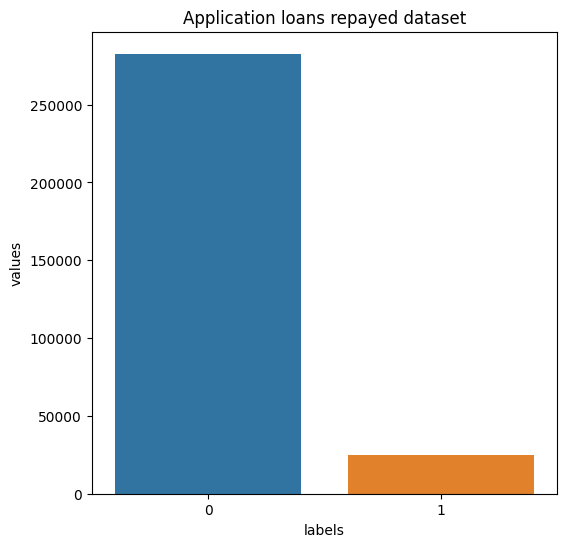

In [ ]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
plt.show()


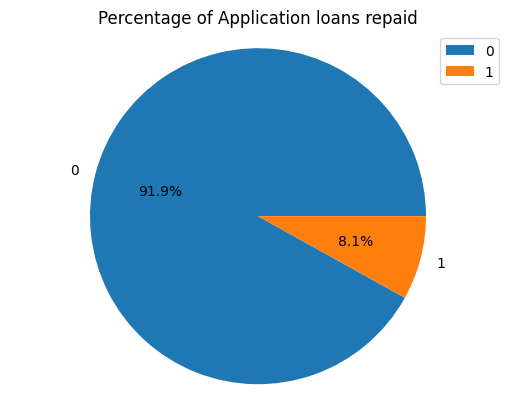

In [ ]:
# Count the amount of data for each category
jumlah_data = application_train['TARGET'].value_counts()

# Plot diagram lingkaran
plt.pie(jumlah_data, labels=jumlah_data.index, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=jumlah_data.index, loc='upper right')
plt.title('Percentage of Application loans repaid')
plt.show()

## Explore the dataExploratory Data Analysis


### Loan types


    
Dan lihat jenis pinjaman yang diambil dan juga, di petak terpisah, persentase pinjaman (berdasarkan jenis pinjaman) dengan nilai **TARGET** 1 (pinjaman tidak dikembalikan).

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

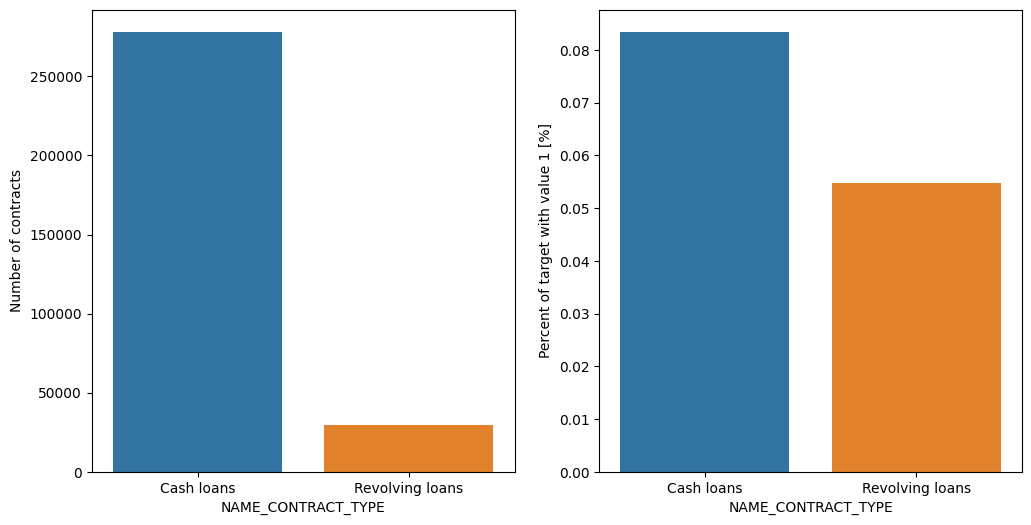

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

Jenis kontrak *Revolving Loans* hanyalah sebagian kecil dari jumlah total pinjaman; pada saat yang sama, *Revolving Loans* dalam jumlah yang lebih besar, dibandingkan dengan frekuensinya, tidak dilunasi.

### Client gender

Mari kita lihat jenis kelamin klien dan juga, pada plot terpisah, persentase pinjaman (berdasarkan jenis kelamin klien) dengan nilai TARGET 1.

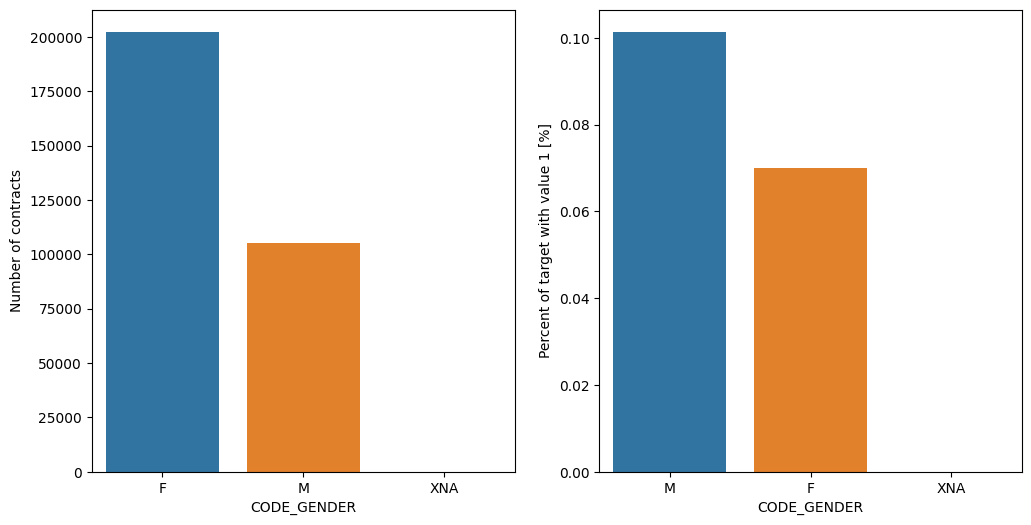

In [ ]:
plot_stats('CODE_GENDER')

<Axes: xlabel='TARGET', ylabel='CODE_GENDER'>

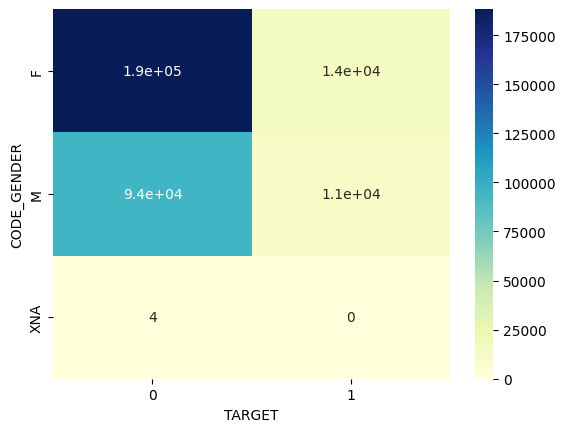

In [ ]:
# Create contingency tables for gender and target columns
tabel_kontingensi = pd.crosstab(application_train['CODE_GENDER'], application_train['TARGET'])

# Show contingency table
sns.heatmap(tabel_kontingensi, annot=True, cmap="YlGnBu")

In [ ]:
# Create contingency tables for gender and target columns
tabel_kontingensi = pd.crosstab(application_train['CODE_GENDER'], application_train['TARGET'])

# Modification of the contingency table view
styled_table = tabel_kontingensi.style \
    .set_caption('Tabel Kontingensi') \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('font-size', '12px')]}
    ])

# Show modified contingency table
styled_table

TARGET,0,1
CODE_GENDER,,
F,188278,14170
M,94404,10655
XNA,4,0


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
tabel_kontingensi = pd.crosstab(application_train['CODE_GENDER'], application_train['TARGET'])

# Chi-square test
chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Display chi-square test results
print("Statistik Chi-square:", chi2)
print("p-value:", p_value)

Statistik Chi-square: 920.7913340361749
p-value: 1.1290217848908289e-200


Secara keseluruhan, jumlah klien wanita (F) hampir dua kali lipat jumlah klien pria (M). Dilihat dari persentase pengembalian peminjaman, laki-laki memiliki peluang lebih tinggi untuk tidak mengembalikan pinjaman mereka dibanding perempuan.

### Flag own car and flag own real estate

Mari kita periksa bendera yang memberi tahu kita jika klien memiliki mobil atau real estat dan, pada petak terpisah, persentase nilai pinjaman dari bendera ini) dengan nilai TARGET 1 (pinjaman tidak dikembalikan).

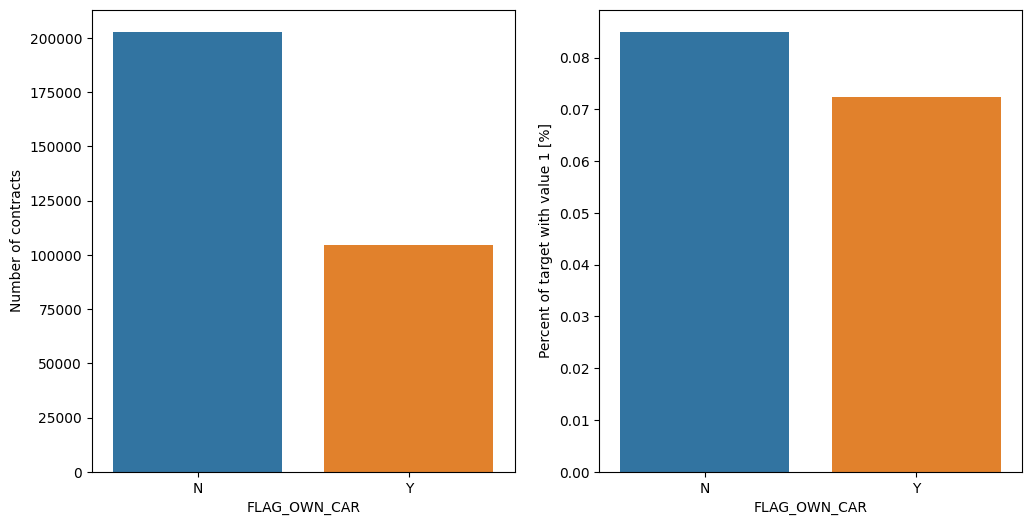

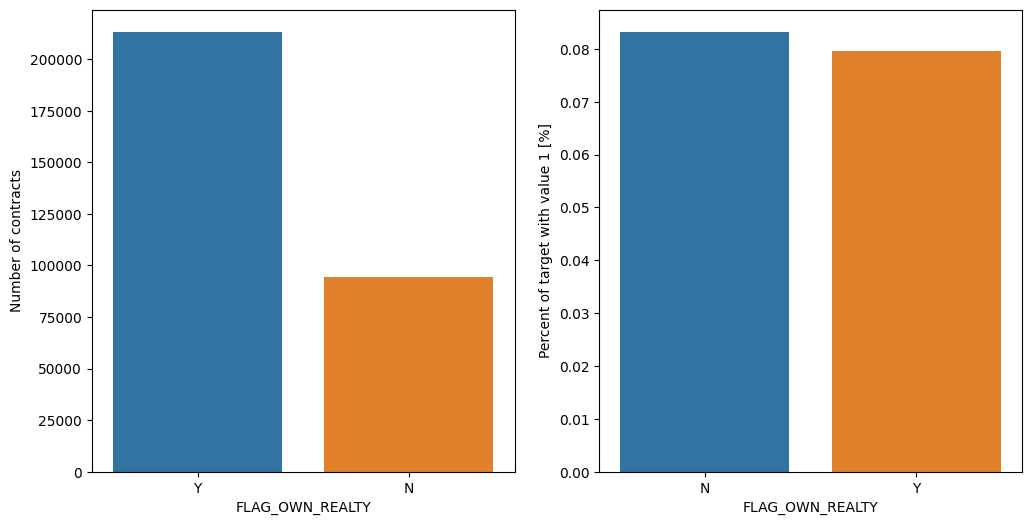

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Klien yang memiliki mobil hampir setengah dari klien yang tidak memilikinya. Kedua kategori tersebut memiliki tingkat tidak-pembayaran sekitar 8%.

Klien yang memiliki real estat lebih dari dua kali lipat klien yang tidak memiliki. Kedua kategori (memiliki real estat atau tidak memiliki) memiliki tingkat tidak membayar kembali sekitar 8%.


### Client  accompanied by

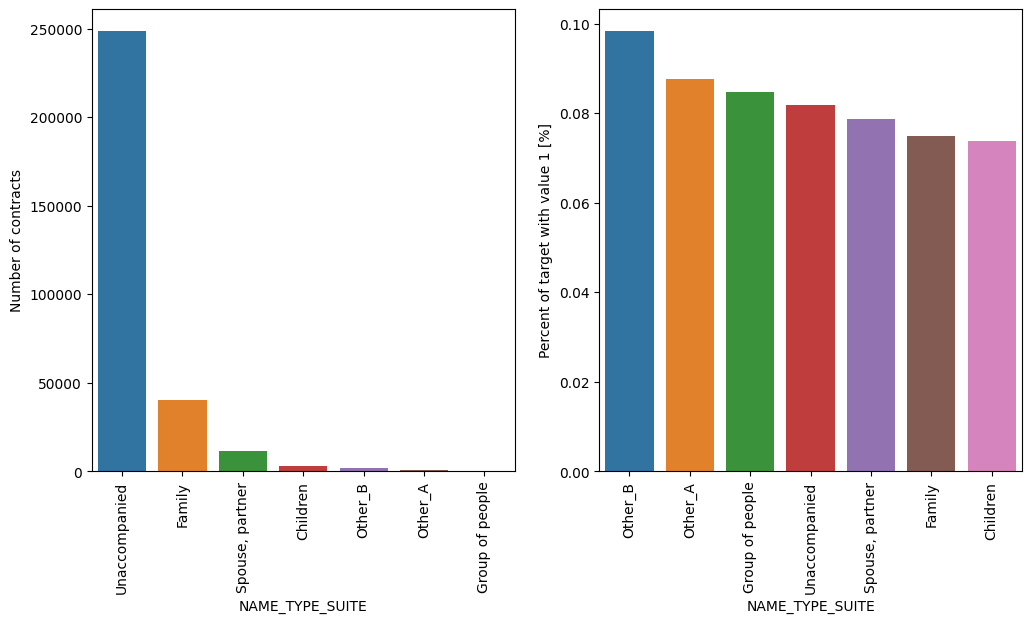

In [ ]:
plot_stats('NAME_TYPE_SUITE',True, True)

Sebagian besar klien tidak ditemani saat mengajukan pinjaman.
Dalam hal persentase pinjaman yang tidak dilunasi, klien yang didampingi oleh Other_B dan Other_A lebih kecil kemungkinannya untuk membayar kembali.

### Family status of client

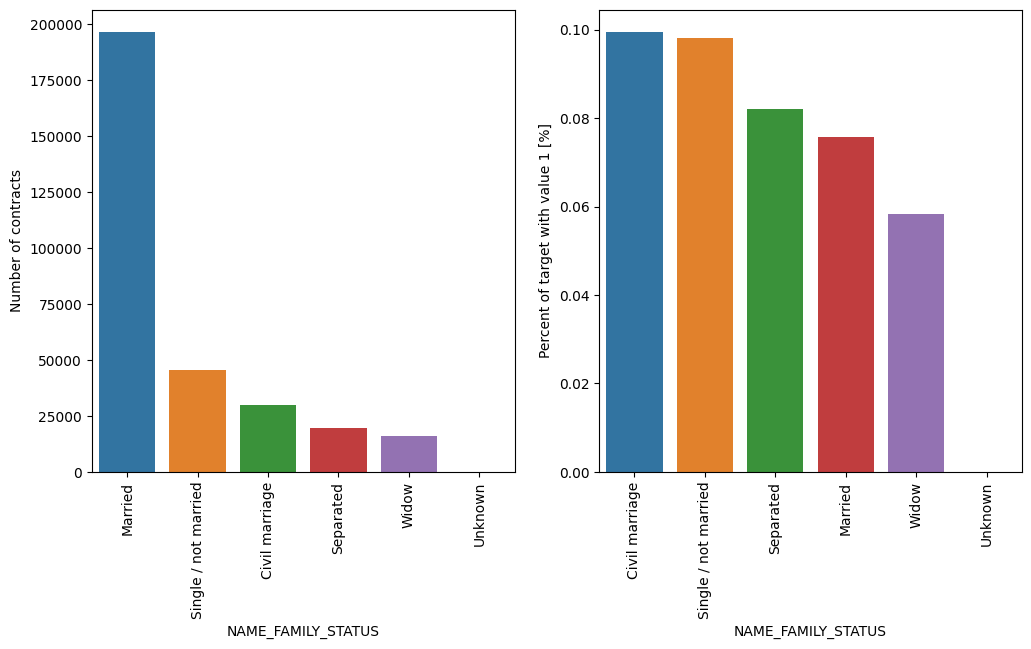

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Sebagian besar klien sudah menikah, diikuti Single/belum menikah dan pernikahan sipil.

Dalam hal persentase tidak dilunasi pinjaman, Perkawinan sipil memiliki persentase tidak dilunasi tertinggi (10%), dengan Janda yang terendah (pengecualian *Tidak diketahui*).

### Number of children

Mari kita lihat bagaimana distribusi jumlah anak klien.

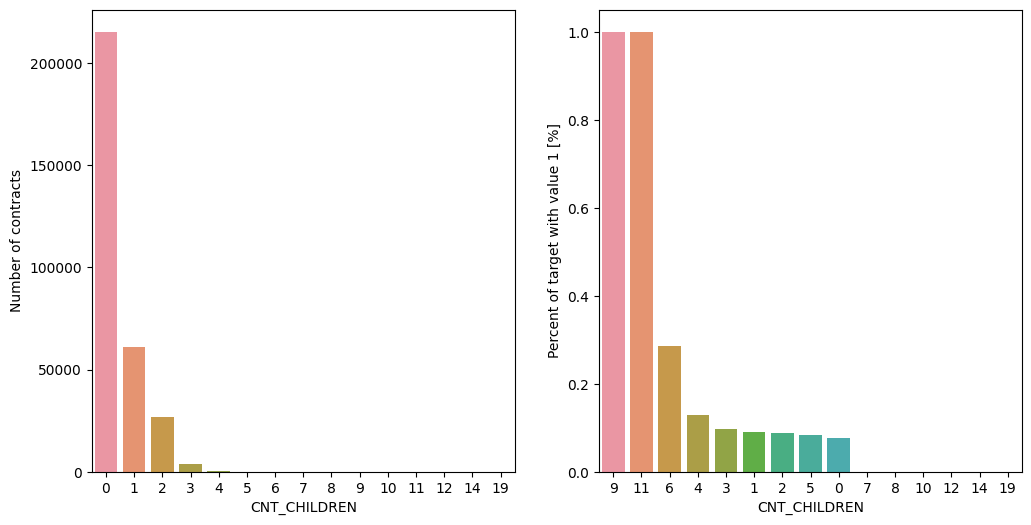

In [ ]:
plot_stats('CNT_CHILDREN')

Sebagian besar klien yang mengambil pinjaman tidak memiliki anak. Jumlah pinjaman yang terkait dengan klien dengan satu anak 4 kali lebih kecil, jumlah pinjaman yang terkait dengan klien dengan dua anak 8 kali lebih kecil; klien dengan 3, 4 anak atau lebih jauh lebih jarang.

Untuk pelunasan, klien tanpa anak, 1, 2, 3, dan 5 anak memiliki persentase tidak membayar rata-rata sekitar (10%). Klien dengan 4 dan 6 anak berada di atas rata-rata dalam hal persentase pinjaman yang tidak dibayar kembali (lebih dari 25% untuk keluarga dengan 6 anak).

Sedangkan untuk klien dengan 9 atau 11 anak, persentase pinjaman yang tidak dilunasi adalah 100%.

### Number of family members of client

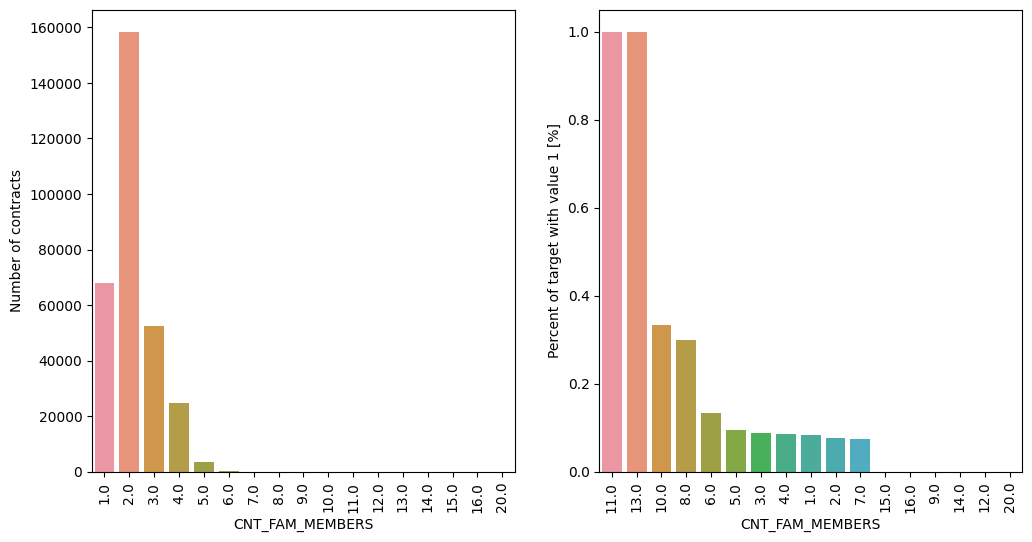

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

Klien dengan anggota keluarga 2 paling banyak, diikuti oleh 1 (single), 3 (keluarga dengan satu anak) dan 4.

Klien dengan ukuran keluarga 11 dan 13 memiliki tingkat pembayaran tidak 100%. Keluarga lain dengan 10 atau 8 anggota memiliki persentase tidak membayar kembali pinjaman lebih dari 30%. Keluarga dengan 6 anggota atau kurang memiliki tingkat pengembalian yang mendekati rata-rata 10%.

### Income type of client

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

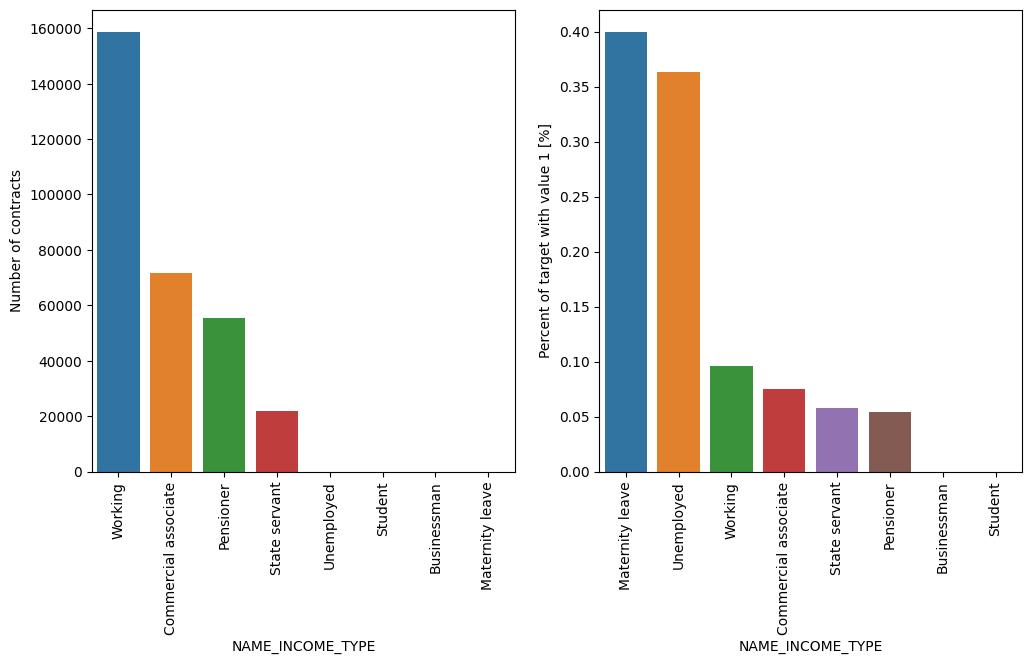

In [ ]:
plot_stats('NAME_INCOME_TYPE',True,True)

Sebagian besar pemohon pinjaman adalah pendapatan dari *Bekerja*, diikuti oleh *Asosiasi Komersial*, *Pensiunan* dan *Pegawai Negara*.

Pemohon dengan jenis penghasilan *Cuti melahirkan* memiliki rasio tidak mengembalikan pinjaman hampir 40%, diikuti oleh *Pengangguran* (37%). Jenis pendapatan lainnya berada di bawah rata-rata 10% karena tidak mengembalikan pinjaman.

### Occupation of client



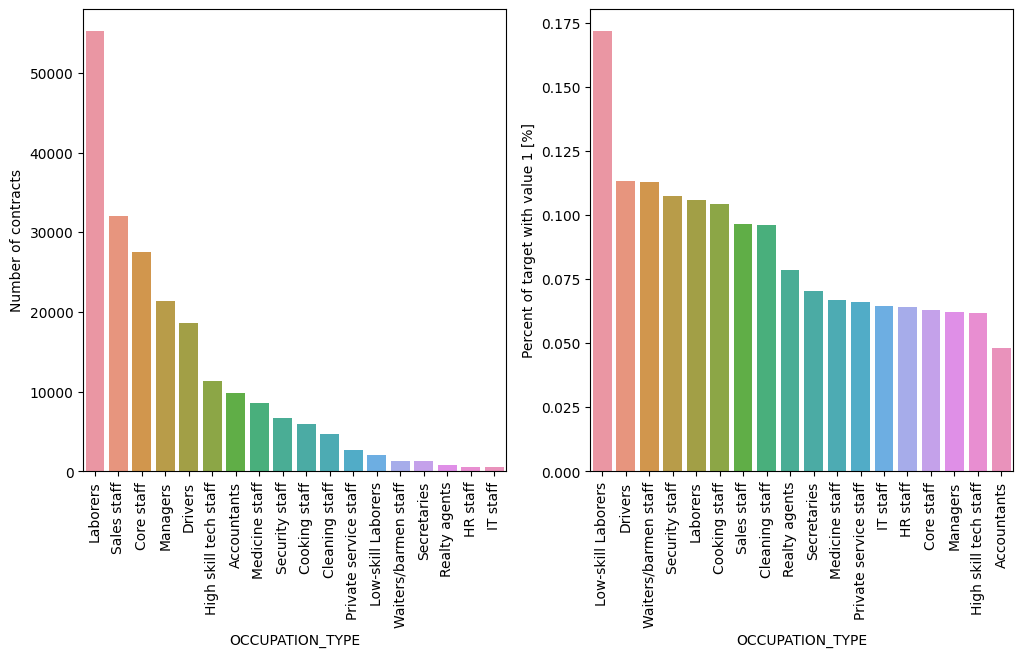

In [ ]:
plot_stats('OCCUPATION_TYPE',True, True)

Sebagian besar pinjaman diambil oleh *Buruh*, diikuti oleh *staf Penjualan*. *Staf IT* mengambil jumlah pinjaman terendah.

Kategori dengan persentase pinjaman tidak dilunasi tertinggi adalah *Buruh Keterampilan Rendah* (di atas 17%), diikuti oleh *Pengemudi* dan *Staf Pelayan/Barmen*, *Staf Keamanan*, *Buruh* dan *Staf Memasak*.

### Organization type

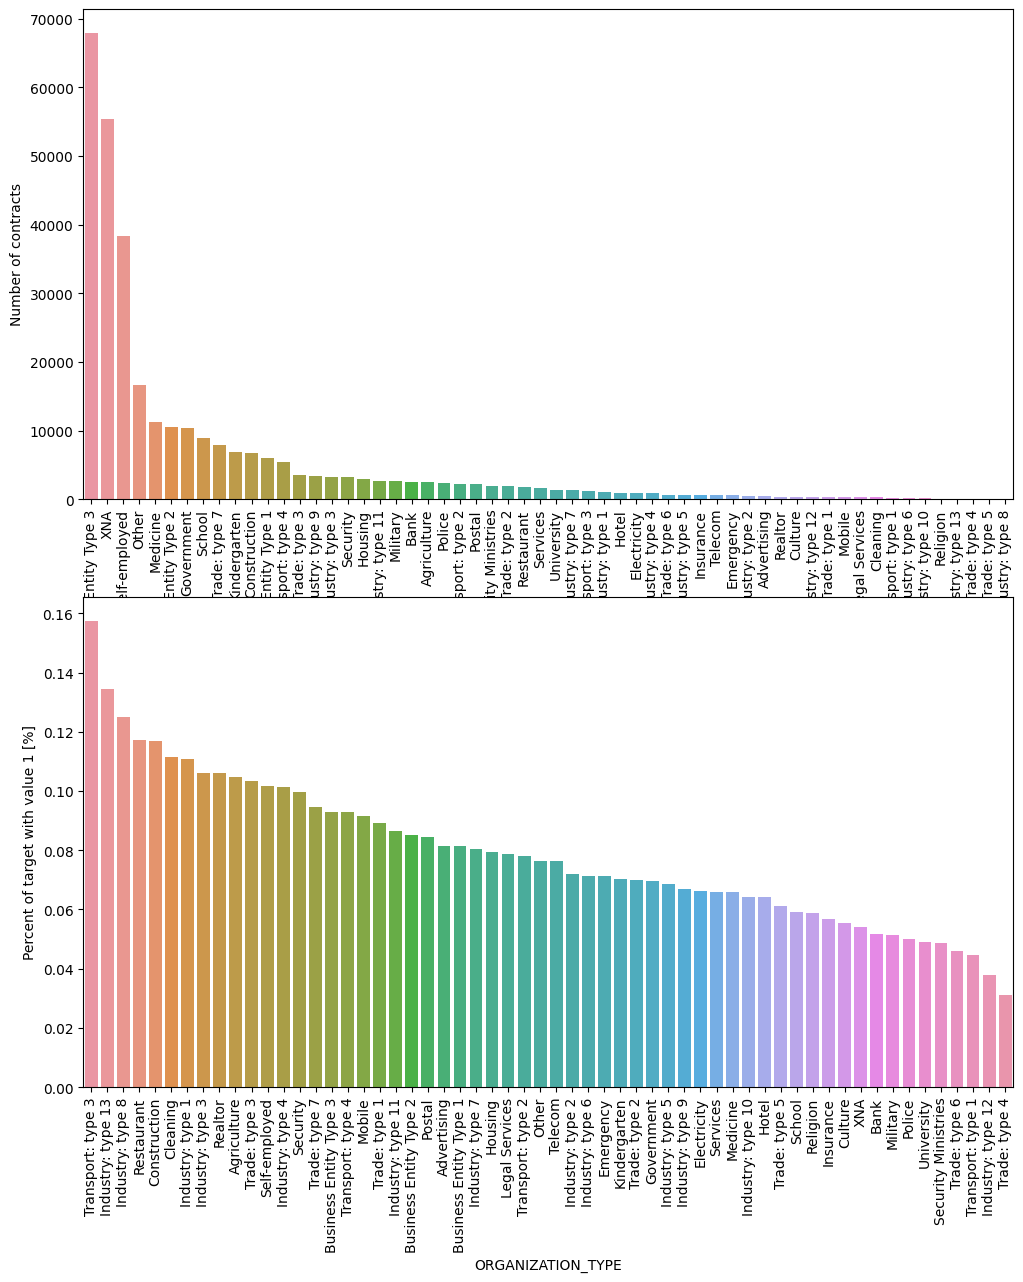

In [ ]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organisasi dengan persentase tertinggi pinjaman tidak dilunasi adalah *Transportasi: tipe 3* (16%), *Industri: tipe 13* (13,5%), *Industri: tipe 8* (12,5%) dan *Restoran* (kurang dari 12% ).

### Education type of the client

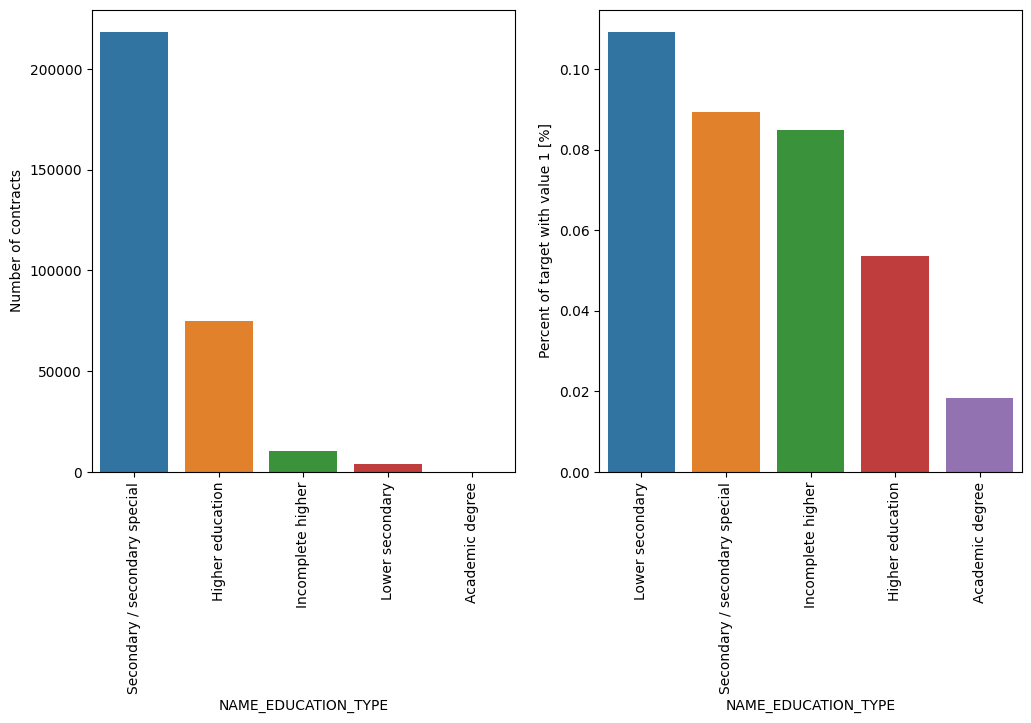

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

Mayoritas klien berpendidikan menengah/menengah khusus, diikuti oleh klien berpendidikan tinggi. Hanya sedikit sekali yang bergelar sarjana.

Kategori menengah bawah, meskipun jarang, memiliki tingkat tidak mengembalikan pinjaman terbesar (11%). Orang-orang dengan gelar Akademik memiliki tingkat tidak membayar kurang dari 2%.

### Type of the housing of client

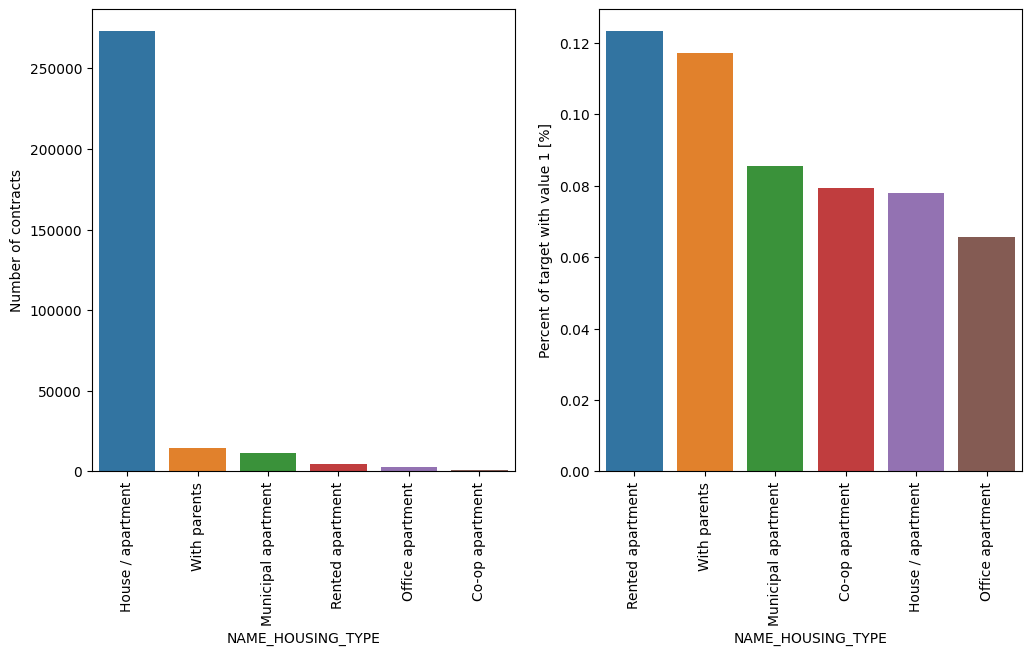

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

Lebih dari 250.000 pemohon kredit mendaftarkan rumah mereka sebagai Rumah/apartemen. Kategori berikut memiliki jumlah klien yang sangat kecil (Dengan orang tua, apartemen Kota).

Dari kategori ini, *Apartemen sewaan* dan *Dengan orang tua* memiliki tingkat tidak dapat dilunasi lebih dari 10%.

### Total income distribution

In [ ]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):

    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
application_train['AMT_INCOME_TOTAL'].min(),application_train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

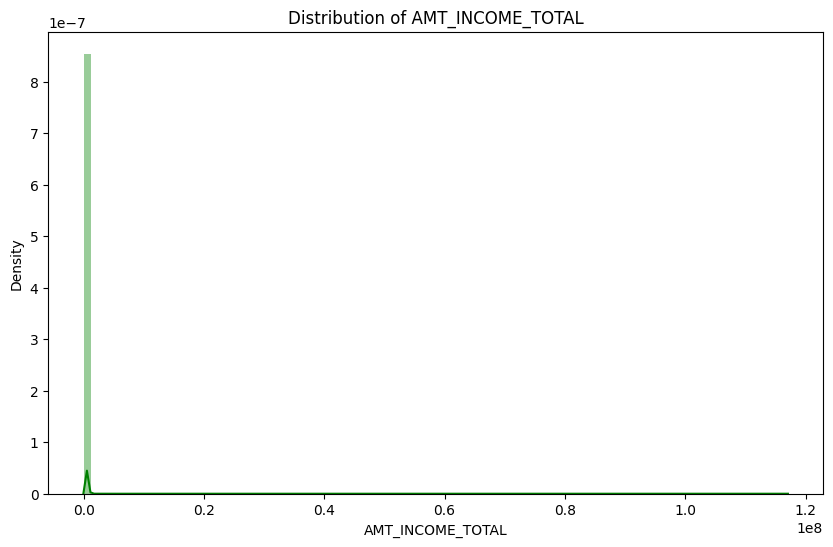

In [ ]:
plot_distribution('AMT_INCOME_TOTAL','green')


Nilai pendapatan sangat tinggi untuk pengamatan tertentu jadi mengapa grafiknya muncul seperti ini. Saat kami melakukan deteksi anomali, kami tidak akan menghapusnya.

### Credit distribution

Mari kita plot distribusi kredit.

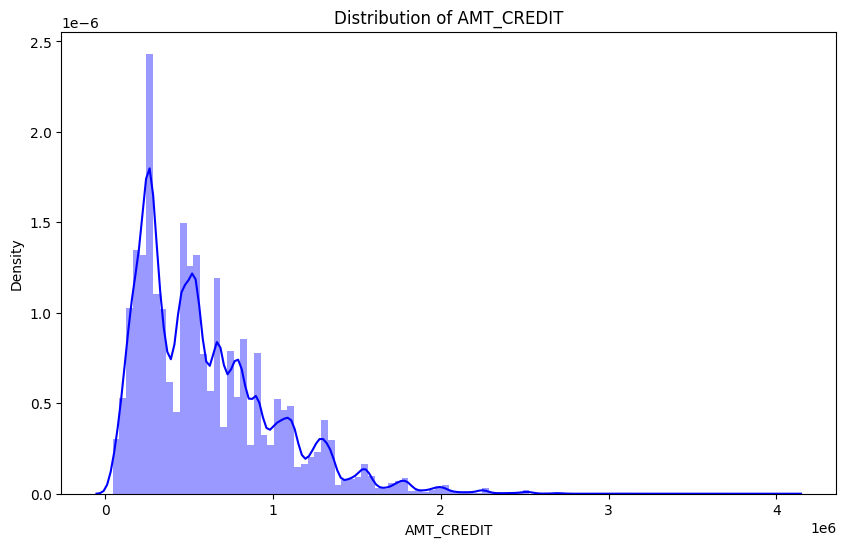

In [ ]:
plot_distribution('AMT_CREDIT','blue')

### Annuity distribution



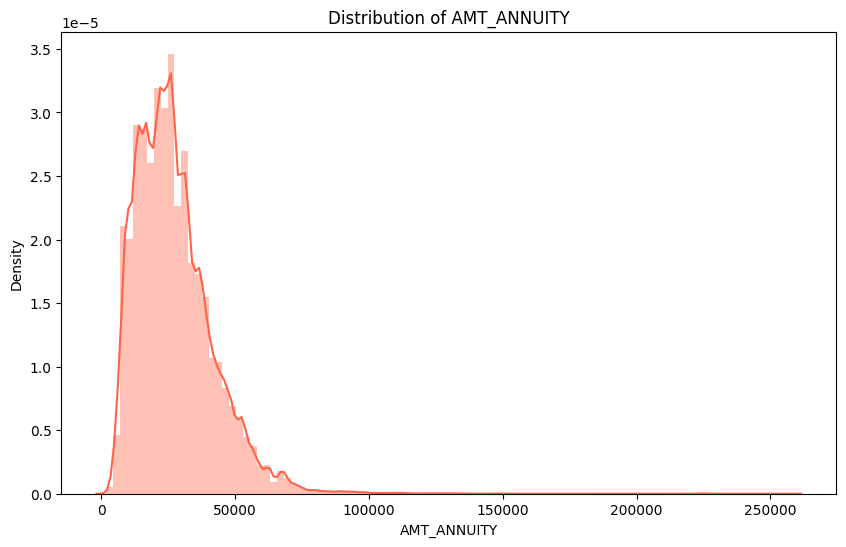

In [ ]:
plot_distribution('AMT_ANNUITY','tomato')

### Goods price


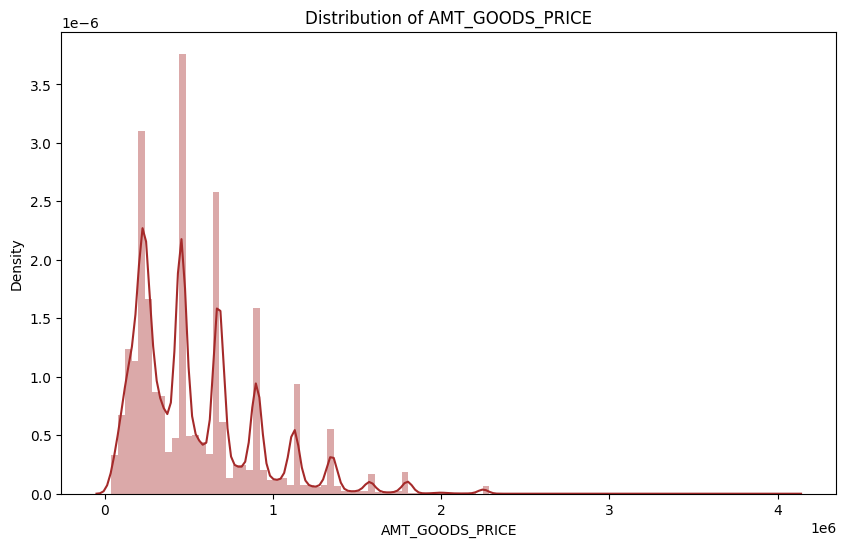

In [ ]:
plot_distribution('AMT_GOODS_PRICE','brown')

### Days from birth distribution



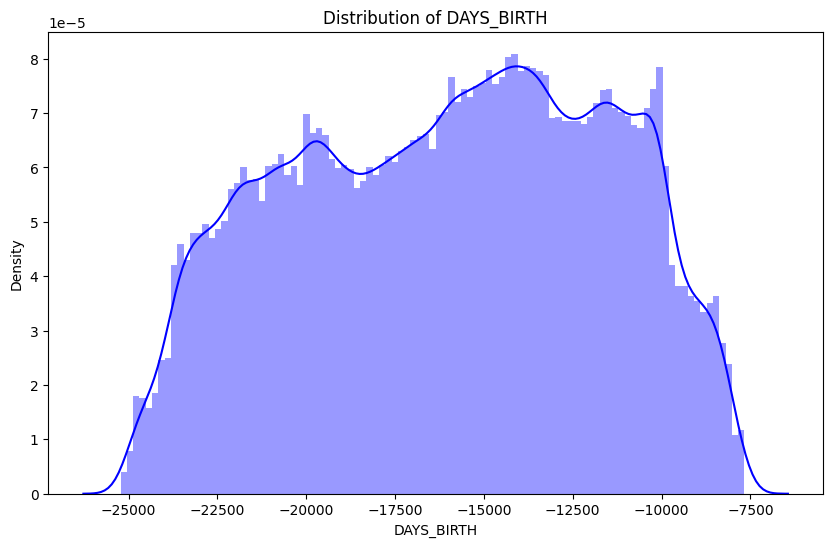

In [ ]:
plot_distribution('DAYS_BIRTH','blue')

Nilai negatif berarti tanggal lahir di masa lalu. Rentang usia adalah antara kira-kira 20 dan 68 tahun.

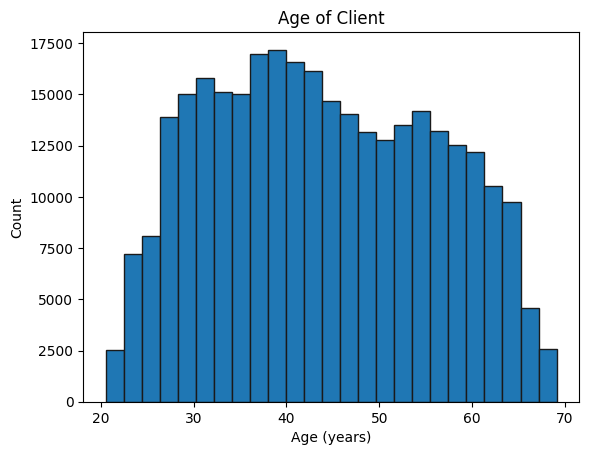

In [ ]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Tidak ada outlier karena semua usia masuk akal. mari kita visualisasikan efek umur pada target, selanjutnya kita akan membuat plot estimasi densitas kernel (KDE) yang diwarnai dengan nilai target.

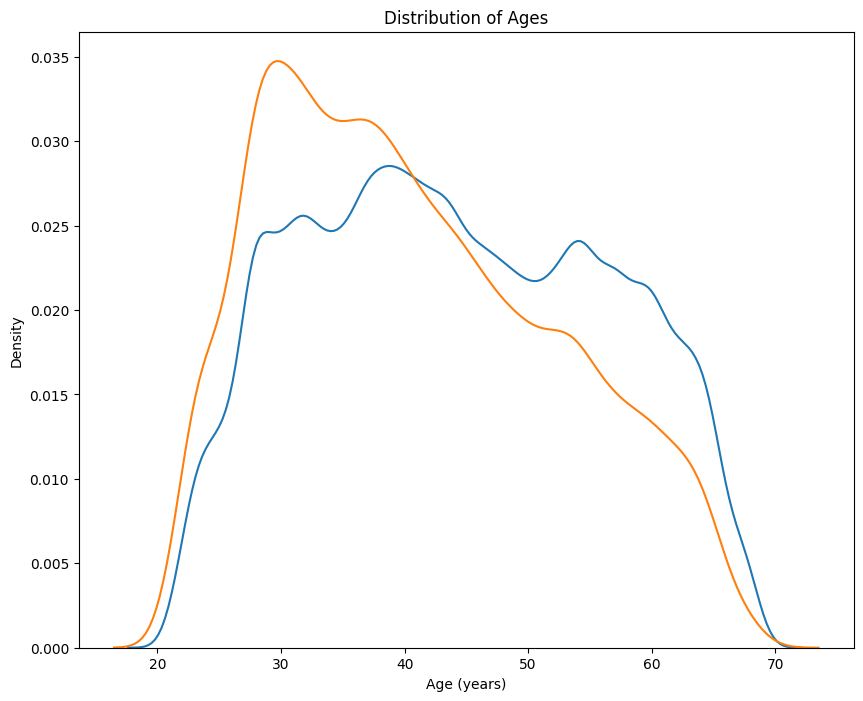

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Kurva target == 1 condong ke ujung rentang yang lebih muda. Meskipun ini bukan korelasi yang signifikan (koefisien korelasi -0,07), variabel ini kemungkinan besar akan berguna dalam model pembelajaran mesin karena memengaruhi target.

Jadi, Ada kecenderungan yang jelas: pelamar yang lebih muda lebih mungkin untuk tidak melunasi pinjaman! Ini adalah informasi yang dapat langsung digunakan oleh bank: karena klien yang lebih muda cenderung tidak dapat melunasi pinjaman, mungkin mereka harus diberi lebih banyak panduan atau tip perencanaan keuangan. Ini tidak berarti bank harus mendiskriminasi nasabah yang lebih muda, tetapi akan bijaksana untuk mengambil tindakan pencegahan untuk membantu nasabah yang lebih muda membayar tepat waktu.

### Days employed distribution



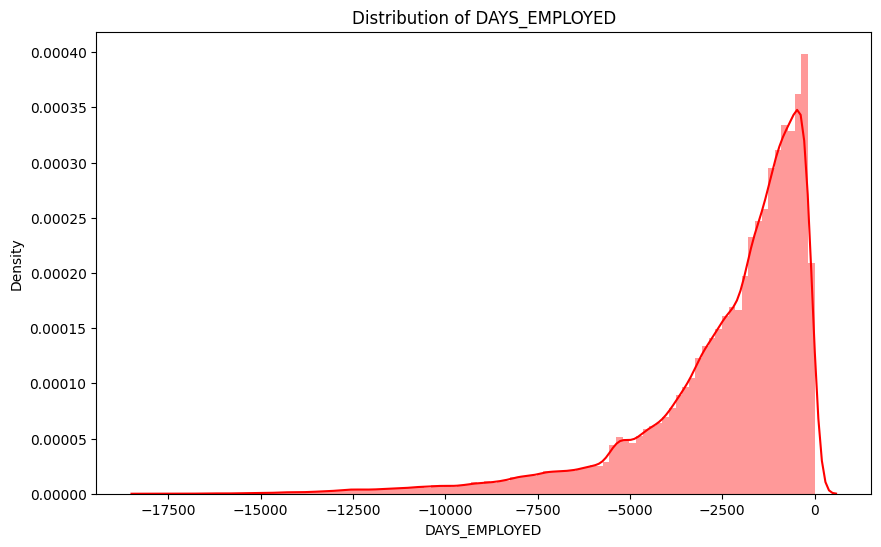

In [ ]:
# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

### Days of registration distribution



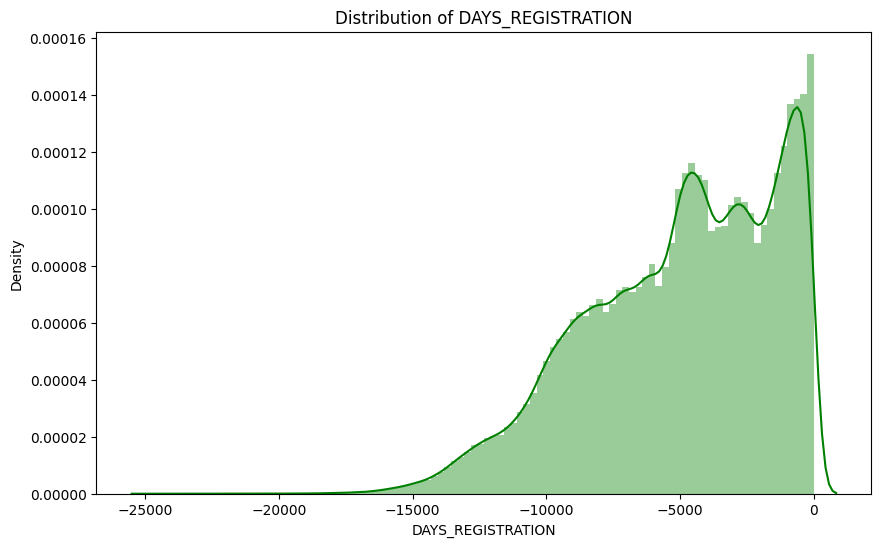

In [ ]:
plot_distribution('DAYS_REGISTRATION','green')

### Days ID publish distribution



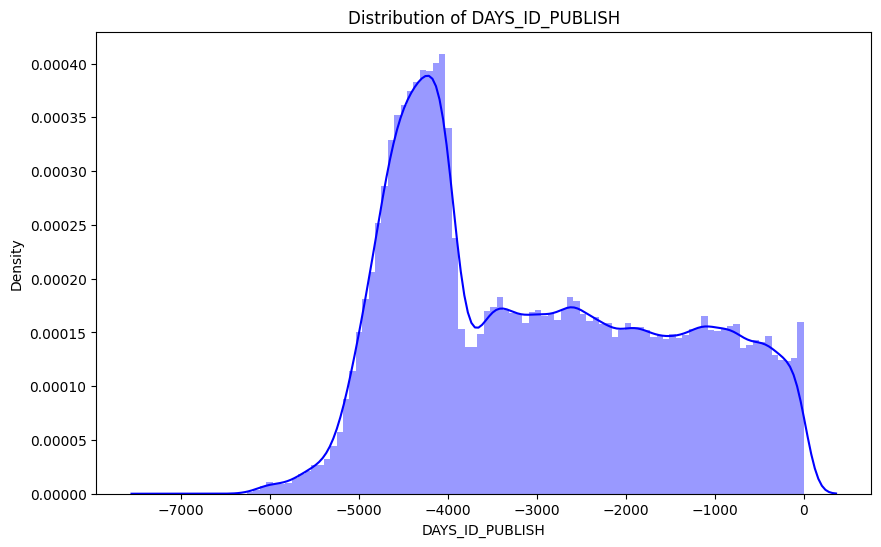

In [ ]:
plot_distribution('DAYS_ID_PUBLISH','blue')

### Comparison of interval values with TARGET = 1 and TARGET = 0

Mari bandingkan distribusi nilai interval yang diplot di atas untuk nilai **TARGET = 1** dan **TARGET = 0**

<Figure size 640x480 with 0 Axes>

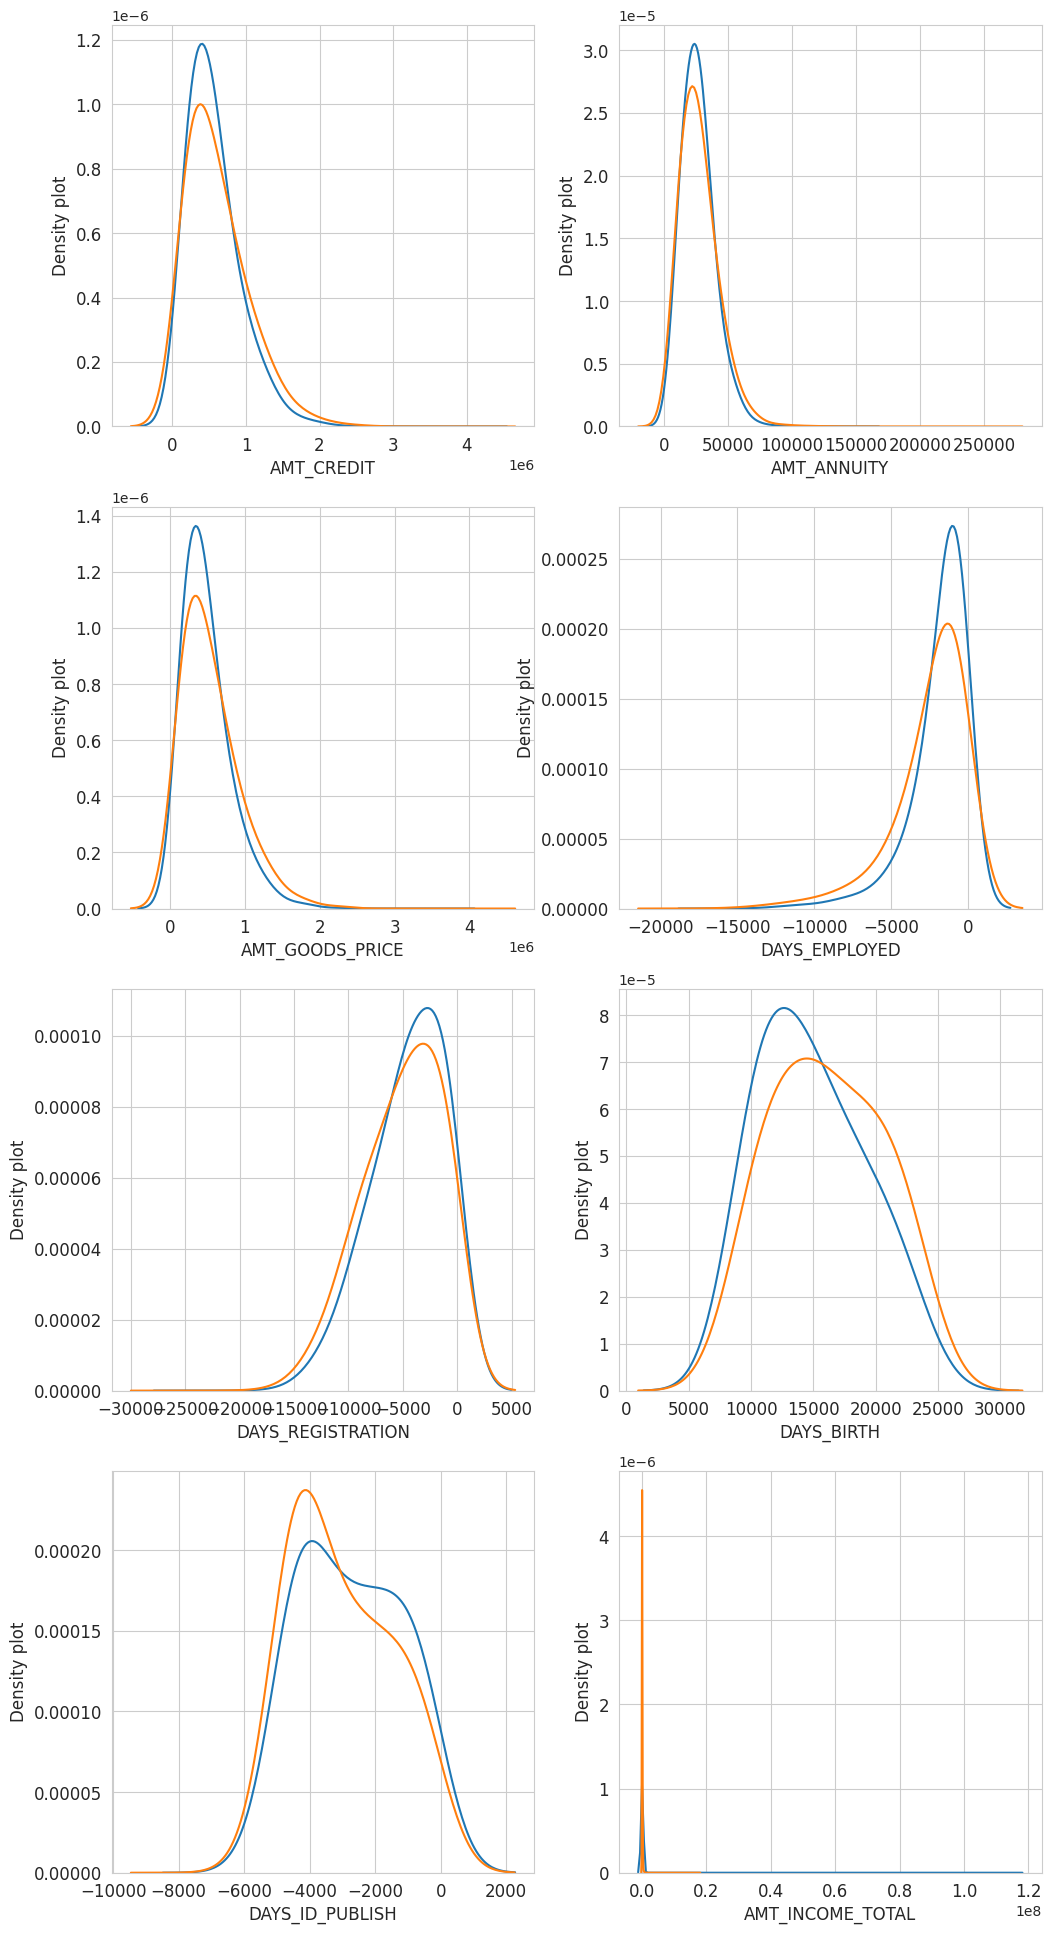

In [ ]:
var = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL']
plot_distribution_comp(var,nrow=4)

### Region registered not live region and not work region

Mari kita wakili nilai wilayah terdaftar dan bukan wilayah hidup dan wilayah terdaftar dan bukan wilayah kerja.

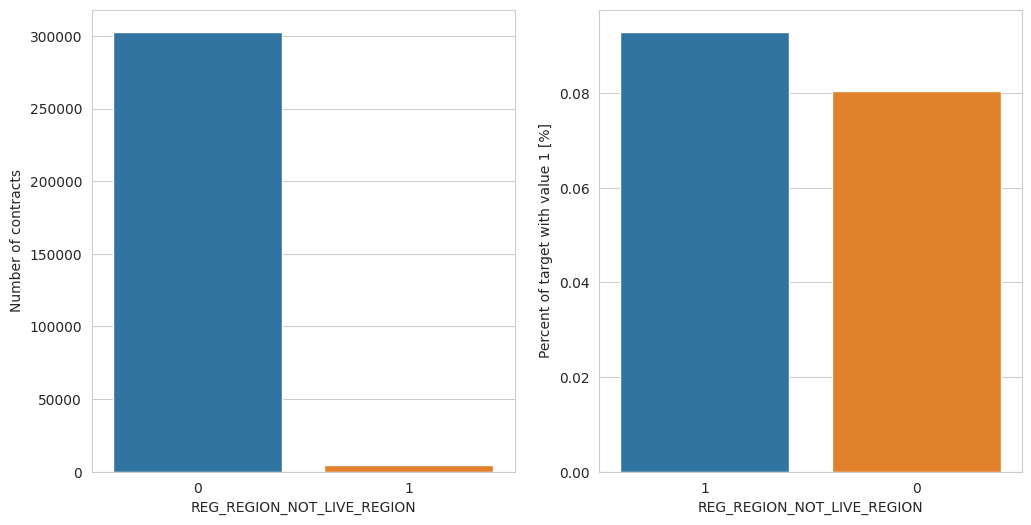

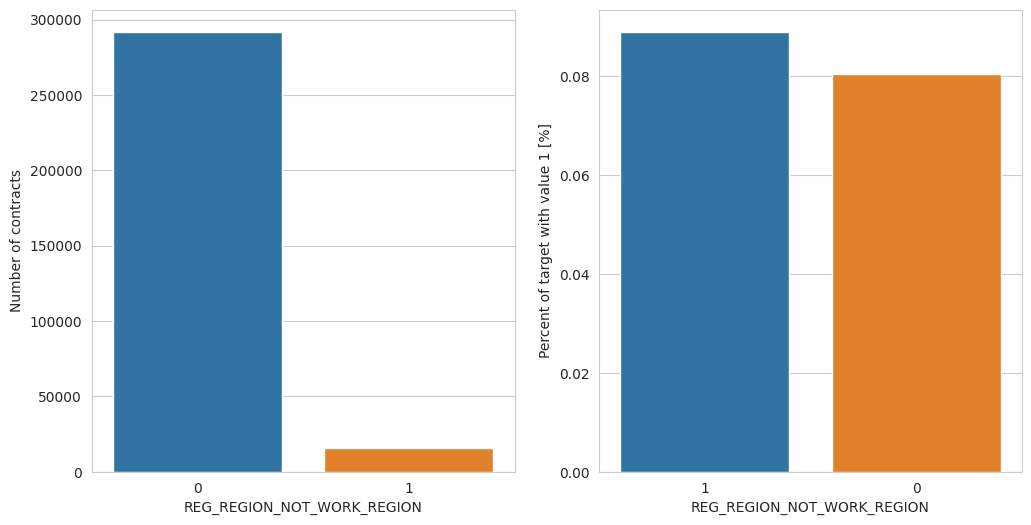

In [ ]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Sangat sedikit orang yang terdaftar di wilayah tidak hidup atau tidak bekerja. Secara umum, tingkat tidak kembali sedikit lebih besar untuk kasus ini daripada yang lain (sedikit di atas 8% dibandingkan dengan sekitar 8%).

In [ ]:

# Create contingency tables for gender and target columns
tabel_kontingensi2 = pd.crosstab(application_train['REG_REGION_NOT_LIVE_REGION'], application_train['REG_REGION_NOT_WORK_REGION'])

# Modification of the contingency table view
styled_table2 = tabel_kontingensi2.style \
    .set_caption('Tabel Kontingensi') \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('font-size', '12px')]}
    ])

# Show modified contingency table
styled_table2

REG_REGION_NOT_WORK_REGION,0,1
REG_REGION_NOT_LIVE_REGION,,
0,291195,11659
1,704,3953


### City registered not live city and not work city



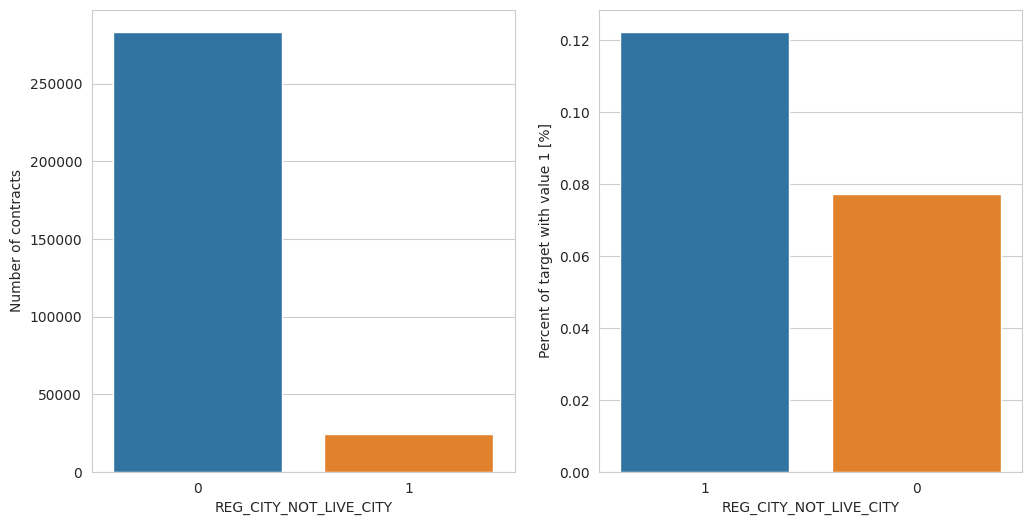

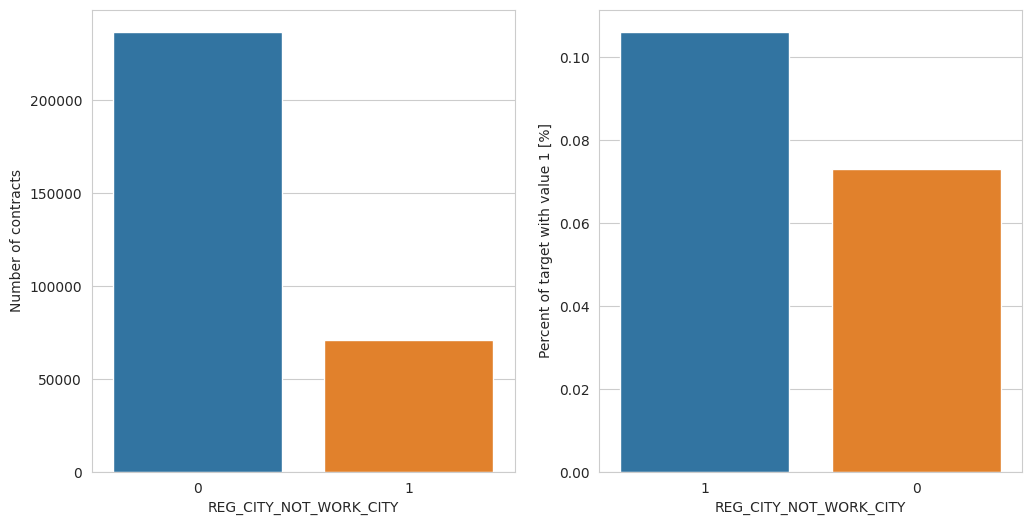

In [ ]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Secara umum, lebih banyak orang yang mendaftar di kota tempat mereka tinggal atau bekerja (jumlah yang lebih besar mendaftar secara berbeda di kota yang bekerja daripada di kota tempat tinggal).

Mereka yang mendaftar di kota yang berbeda dari kota tempat tinggal atau bekerja lebih sering tidak membayar kembali pinjamannya daripada mereka yang mendaftar di kota yang sama (bekerja 11% atau tinggal 12%).

In [ ]:
# Create contingency tables for gender and target columns
tabel_kontingensi3 = pd.crosstab(application_train['REG_REGION_NOT_LIVE_REGION'], application_train['REG_REGION_NOT_WORK_REGION'])

# Modification of the contingency table view
styled_table3 = tabel_kontingensi3.style \
    .set_caption('Tabel Kontingensi') \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('font-size', '12px')]}
    ])

# Show modified contingency table
styled_table3

REG_REGION_NOT_WORK_REGION,0,1
REG_REGION_NOT_LIVE_REGION,,
0,291195,11659
1,704,3953


### Exterior Sources

3 variabel dengan korelasi negatif terkuat dengan target adalah EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3. Menurut dokumentasi, fitur ini mewakili "skor yang dinormalisasi dari sumber data eksternal".


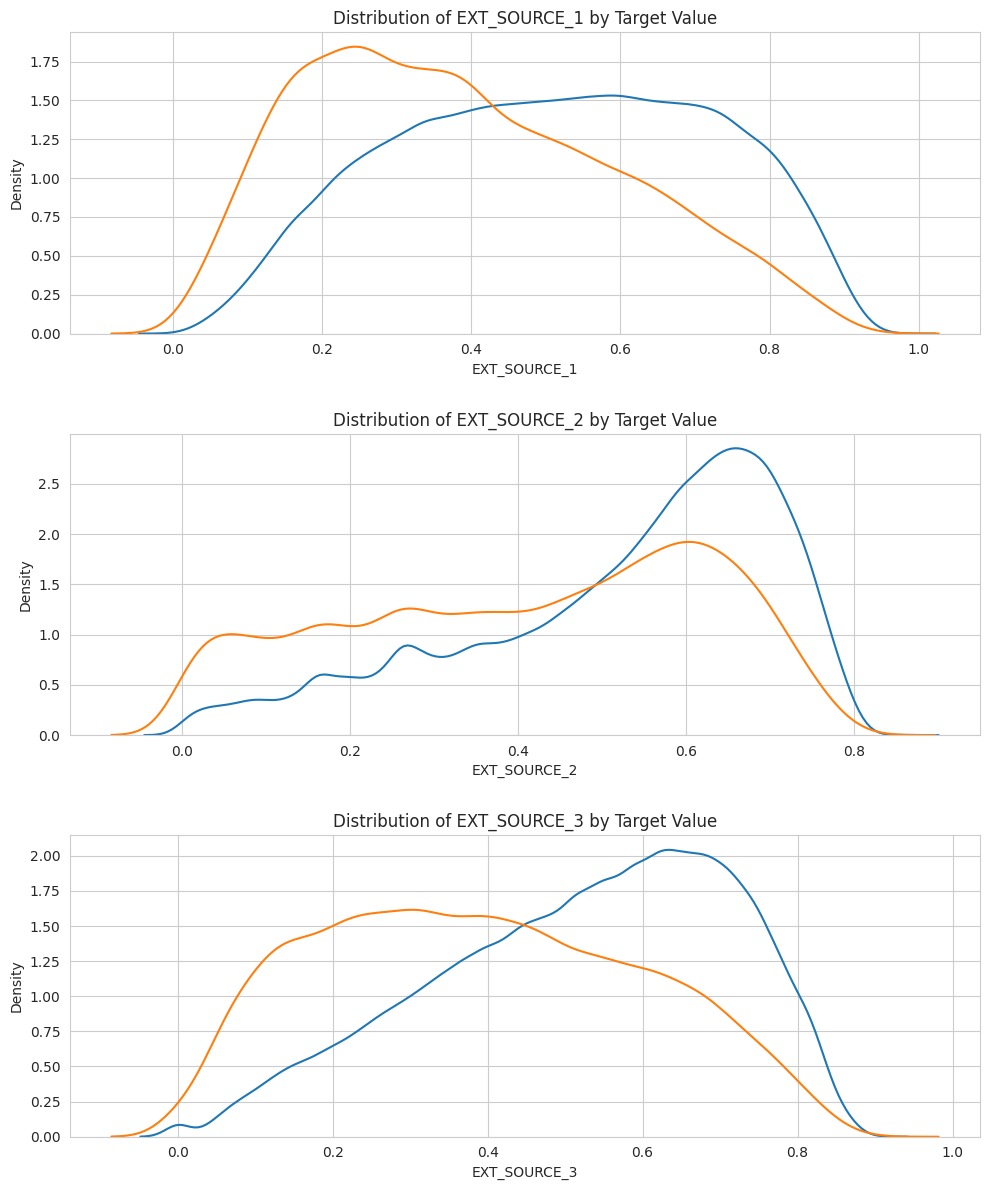

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 menampilkan perbedaan terbesar antara nilai target. Kami dapat dengan jelas melihat bahwa fitur ini memiliki beberapa hubungan dengan kemungkinan pemohon membayar kembali pinjaman.


Mari kita lihat juga korelasi fitur EXT_SOURCE dengan target dan satu sama lain.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


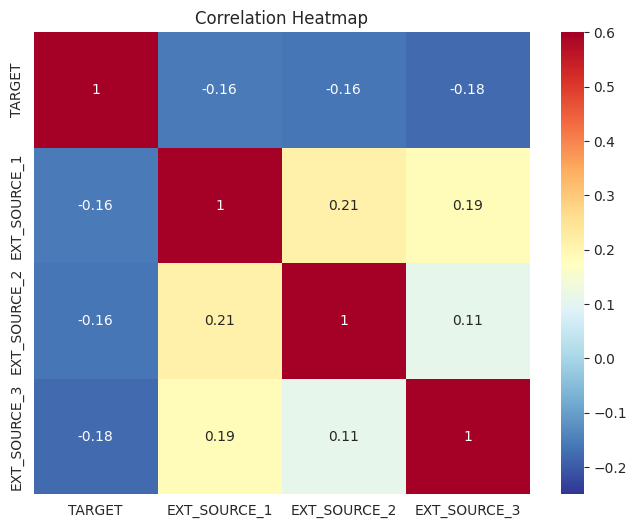

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Ketiga fitur EXT_SOURCE memiliki korelasi negatif dengan target, yang menunjukkan bahwa seiring dengan peningkatan nilai EXT_SOURCE, klien cenderung membayar kembali pinjamannya.

### correlation

In [ ]:
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

### Correlation Matrix with Heatmap¶
Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.

Korelasi bisa positif (peningkatan satu nilai fitur meningkatkan nilai variabel target) atau negatif (peningkatan satu nilai fitur menurunkan nilai variabel target)

Peta panas memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas dari fitur yang berkorelasi menggunakan library seaborn.

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = application_train.corr().abs()
#corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()


#Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))


There are 34 columns to remove.


In [ ]:
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
to_drop =['REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_POPULATION_RELATIVE']

In [ ]:
print('Training shape: ', application_train.shape)
application_train = application_train.drop(columns = to_drop)
print('New Training shape: ', application_train.shape)

Training shape:  (307511, 122)
New Training shape:  (307511, 87)


In [ ]:
#corrmat = application_train.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(application_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Handling missing values

<Axes: >

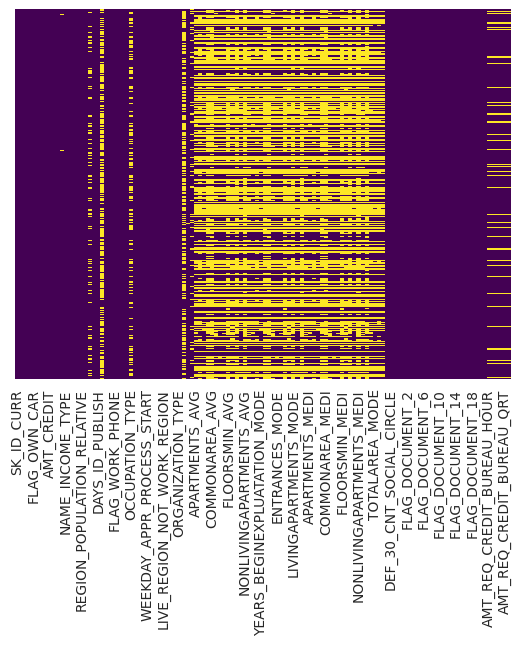

In [ ]:
sns.heatmap(application_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(40)

Your selected dataframe has 122 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [ ]:
application_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [ ]:
categorical_vars = [var for var in application_train.columns if application_train[var].isnull().mean()>0 and
                   application_train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
numeric_vars=missing_values.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'A

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


application_train[numeric_vars] = imputer.fit_transform(application_train[numeric_vars])


In [ ]:
print(application_train['NAME_TYPE_SUITE'].mode())


0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [ ]:
application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [ ]:
print(application_train['OCCUPATION_TYPE'].mode())

0    Laborers
Name: OCCUPATION_TYPE, dtype: object


In [ ]:
application_train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [ ]:
print(application_train['FONDKAPREMONT_MODE'].mode())

0    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object


In [ ]:
application_train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)

In [ ]:
print(application_train['HOUSETYPE_MODE'].mode())

0    block of flats
Name: HOUSETYPE_MODE, dtype: object


In [ ]:
application_train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)

In [ ]:
print(application_train['WALLSMATERIAL_MODE'].mode())

0    Panel
Name: WALLSMATERIAL_MODE, dtype: object


In [ ]:
application_train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)

In [ ]:
print(application_train['EMERGENCYSTATE_MODE'].mode())

0    No
Name: EMERGENCYSTATE_MODE, dtype: object


In [ ]:
application_train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)

In [ ]:
application_train.isnull().sum().sum()

0

In [ ]:
application_train.shape

(307511, 122)

## Encoding
Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
application_train = pd.get_dummies(application_train)

print('Features shape: ', application_train.shape)

Features shape:  (307511, 242)


### Domain Knowledge Features

CREDIT_INCOME_PERCENT: persentase jumlah kredit relatif terhadap pendapatan klien <br>
ANNUITY_INCOME_PERCENT: persentase anuitas pinjaman relatif terhadap pendapatan klien <br>
CREDIT_TERM: lamanya pembayaran dalam beberapa bulan (karena anuitas adalah jumlah bulanan yang jatuh tempo) <br>
DAYS_EMPLOYED_PERCENT:persentase hari bekerja relatif terhadap usia klien <br>

In [ ]:
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

### Save the clean dataset

In [ ]:
# Save cleandataset to Google Drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/home-credit-default-risk/'
application_train.to_csv(path+'cleandata.csv', index=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
